In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
X = data.drop(columns='Purchased')
y = data['Purchased']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_transform = ss.fit_transform(X_train)
X_test_transform = ss.transform(X_test)

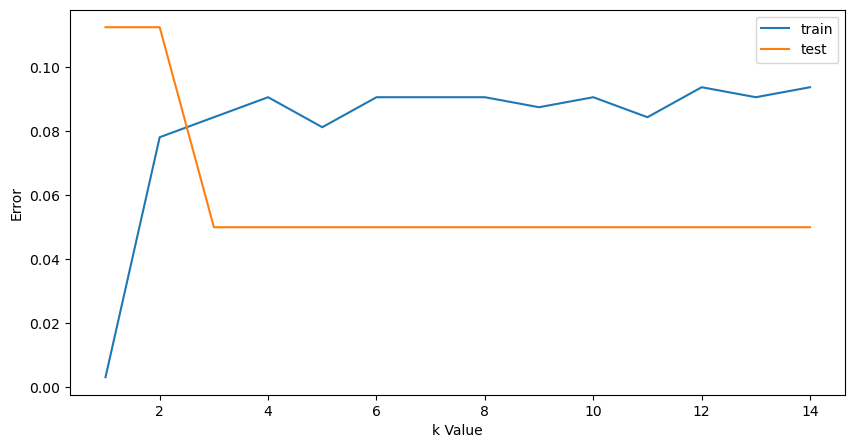

In [4]:
from sklearn.neighbors import KNeighborsClassifier

train_error= []
test_error= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_transform,y_train)
    y_pred_train= knn.predict(X_train_transform)
    train_error.append(np.mean(y_train!= y_pred_train))
    y_pred_test= knn.predict(X_test_transform)
    test_error.append(np.mean(y_test!= y_pred_test))
plt.figure(figsize=(10,5))
plt.plot(range(1,15),train_error,label="train")
plt.plot(range(1,15),test_error,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [5]:
# k = 11
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_transform,y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test_transform)
accuracy_score(y_test,y_pred)

0.95